In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [35]:
# Ignorar advertencias para mantener limpio el output
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('C:/Users/rodri/OneDrive/Documentos/Proyectos Jupiter/TopicosCienciaDatos/train.csv')

In [46]:
# 2. Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])

In [47]:
# 3. Agrupar por 'substation' y modelar ARIMA
substations = df['substation'].unique()

In [70]:
# Crear una figura para visualizar todos los pronósticos
plt.figure(figsize=(12, 1))


<Figure size 1200x100 with 0 Axes>

In [71]:
for substation in substations:
    # Filtrar los datos por substation
    data = df[df['substation'] == substation].copy()
    data.set_index('date', inplace=True)  # Establecer la fecha como índice
    data = data['consumption'].asfreq('H')  # Convertir a frecuencia horaria

In [72]:
 # Manejar valores faltantes (si existen)
data = data.fillna(method='ffill')

In [73]:
 # Dividir los datos en entrenamiento y prueba
train = data[:-24]  # Entrenamiento: todas menos las últimas 24 horas
test = data[-24:]   # Prueba: últimas 24 horas

In [74]:
 # 4. Crear y ajustar el modelo ARIMA
model = ARIMA(train, order=(2, 1, 2))  # Orden ARIMA(p,d,q): puedes ajustarlo
fitted_model = model.fit()

In [75]:
# 5. Predecir sobre el periodo de prueba
forecast = fitted_model.forecast(steps=24)  # Predicción para 24 pasos

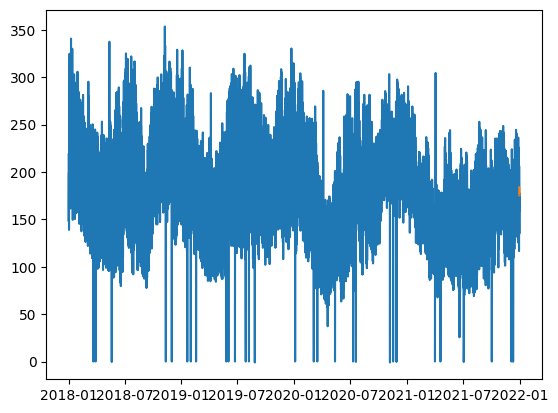

In [82]:
 # 6. Visualizar resultados
plt.plot(data.index, data, label=f'{substation} - Real')
plt.plot(test.index, forecast, '--', label=f'{substation} - Forecast')

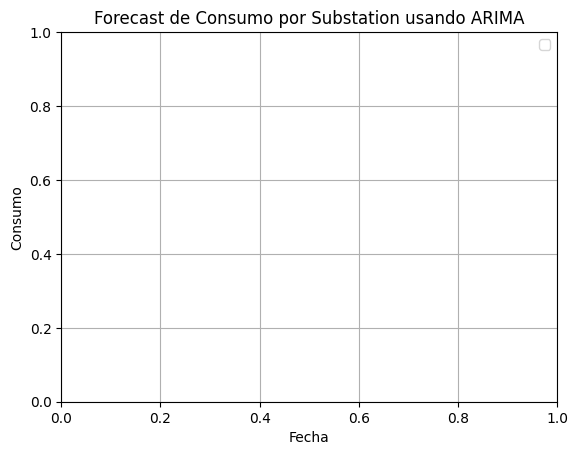

In [83]:
# Personalización del gráfico
plt.title('Forecast de Consumo por Substation usando ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)

In [84]:
# Mostrar gráfico
plt.show()